# R Basic 3

## 3.1 테이블 불러오기

In [1]:
getwd()

[1] "/Users/rohsnghwan/Documents/Repositories/Econometrics/RBasic"

In [2]:
setwd(getwd())
dir()

[1] "401K_description.txt"        "401k.xls"                   
 [3] "data1.csv"                   "data1.txt"                  
 [5] "DataHousingPrice.csv"        "DataHousingPrice.txt"       
 [7] "DataHousingPrice.xls"        "DataHousingPrice.xlsx"      
 [9] "DataHousingPriceMISSING.csv" "ImportingDataAndOLS.R"      
[11] "old_survey.csv"              "RBasic1_data1.csv"          
[13] "RBasic1_data1.txt"           "RBasic1.ipynb"              
[15] "RBasic2.ipynb"               "RBasic3.ipynb"              
[17] "RBasic4.ipynb"               "RBasic5.ipynb"

In [3]:
library(data.table)
survey = fread("old_survey.csv", select = c("handedness", "height", "handspan"))

Warning message:
“package ‘data.table’ was built under R version 3.5.2”

In [4]:
tail(survey)

handedness,height,handspan
1.00,73,21.0
0.56,66,20.0
0.80,63,18.0
0.80,64,21.0
1.00,61,17.5
0.70,71,24.5


## 3.2 Correlation & Covariance
correlation, use = "complete.obs"은 모든 missing observations 제거

In [5]:
survey[ , cor(handspan, height, use = "complete.obs")]
survey[ , cor(handedness, height, use = "complete.obs")]

[1] 0.6042423

[1] 0.1063165

In [6]:
survey[!is.na(handspan) & !is.na(height), cor(handspan, height)]

[1] 0.6042423

alternatively, there's the na.omit function. na.omit은 NA를 제거 

In [13]:
cor(survey, use = "complete.obs")

,handedness,height,handspan
handedness,1.00000000,0.1125605,-0.01719909
height,0.11256055,1.0000000,0.60942759
handspan,-0.01719909,0.6094276,1.00000000


In [14]:
cor(na.omit(survey))

,handedness,height,handspan
handedness,1.00000000,0.1125605,-0.01719909
height,0.11256055,1.0000000,0.60942759
handspan,-0.01719909,0.6094276,1.00000000


In [15]:
survey[is.na(handedness) & !is.na(height) & !is.na(handspan)]

handedness,height,handspan
<dbl>,<int>,<dbl>
NA,70,19.5


In [16]:
survey[ , cov(handspan, height, use = "complete.obs")]
cov(survey, use = "complete.obs")
cov(na.omit(survey))

[1] 5.910786

,handedness,height,handspan
handedness,0.1685042,0.206959,-0.0155499
height,0.2069590,20.062517,6.0121751
handspan,-0.0155499,6.012175,4.8510260


,handedness,height,handspan
handedness,0.1685042,0.206959,-0.0155499
height,0.2069590,20.062517,6.0121751
handspan,-0.0155499,6.012175,4.8510260


## 3.3 Linear Model 추정

In [7]:
## ----lm: linear model 추정, OLS 추정---------------------------------------
survey[ , lm(height ~ handspan)]


Call:
lm(formula = height ~ handspan)

Coefficients:
(Intercept)     handspan  
     42.251        1.229  


In [8]:
## ----lm_rev--------------------------------------------------------------
survey[ , lm(handspan ~ height)]


Call:
lm(formula = handspan ~ height)

Coefficients:
(Intercept)       height  
     0.5305       0.2970  


## 3.4 Plot

NULL

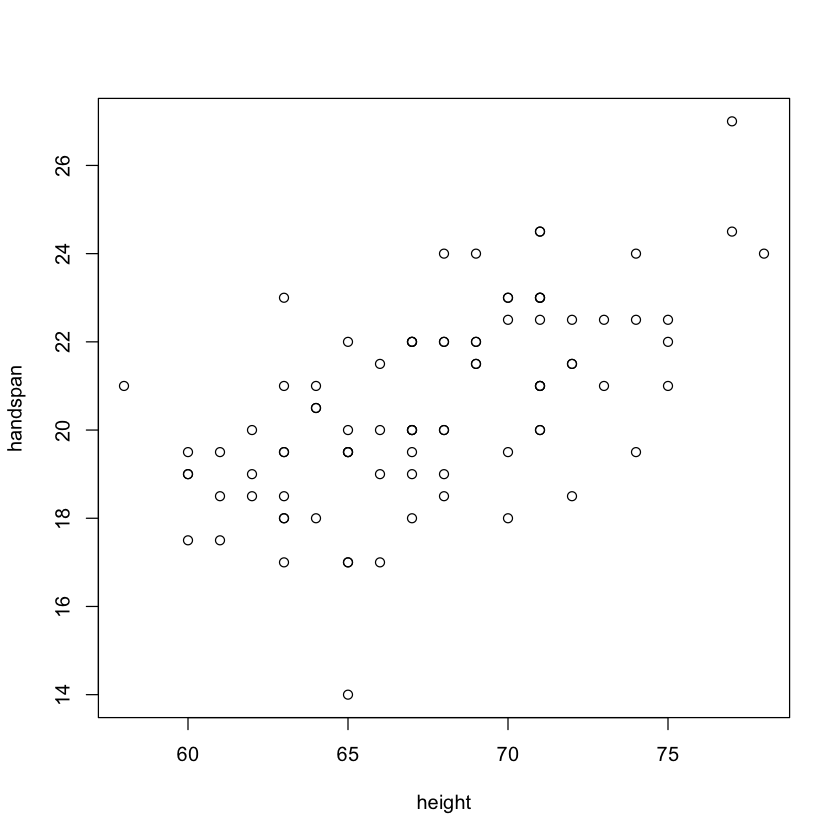

In [9]:
## ----plot_formula, results = 'hide'--------------------------------------
survey[ , plot(handspan ~ height)]

NULL

NULL

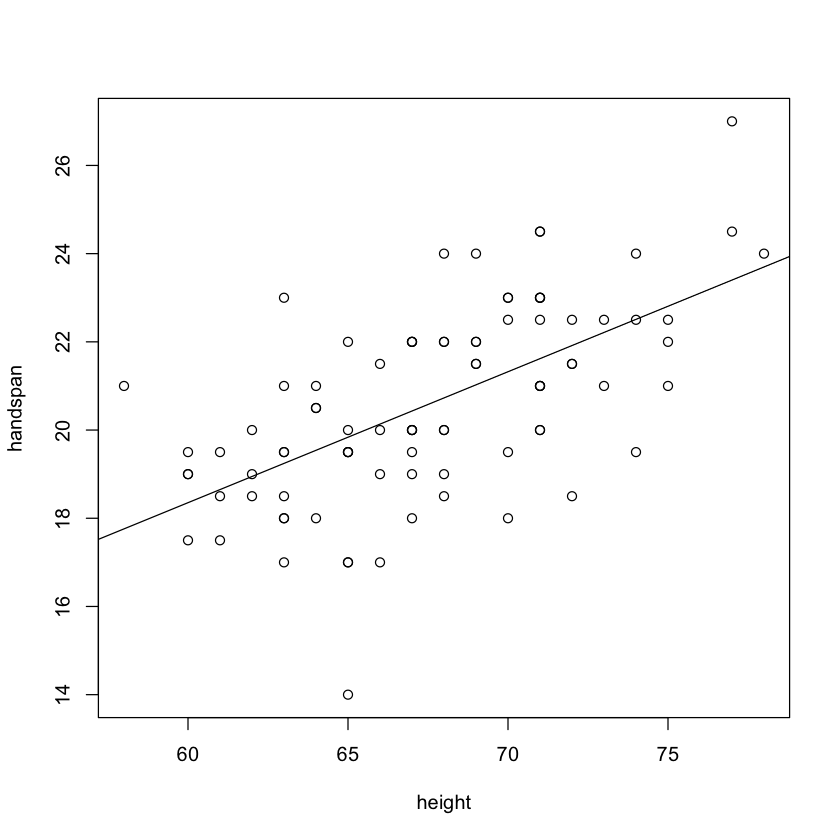

In [10]:
## ----abline_lm, regression line: intercept and slope of the linear model -
survey[ , plot(handspan ~ height)]
survey[ , abline(lm(handspan ~ height))]

NULL

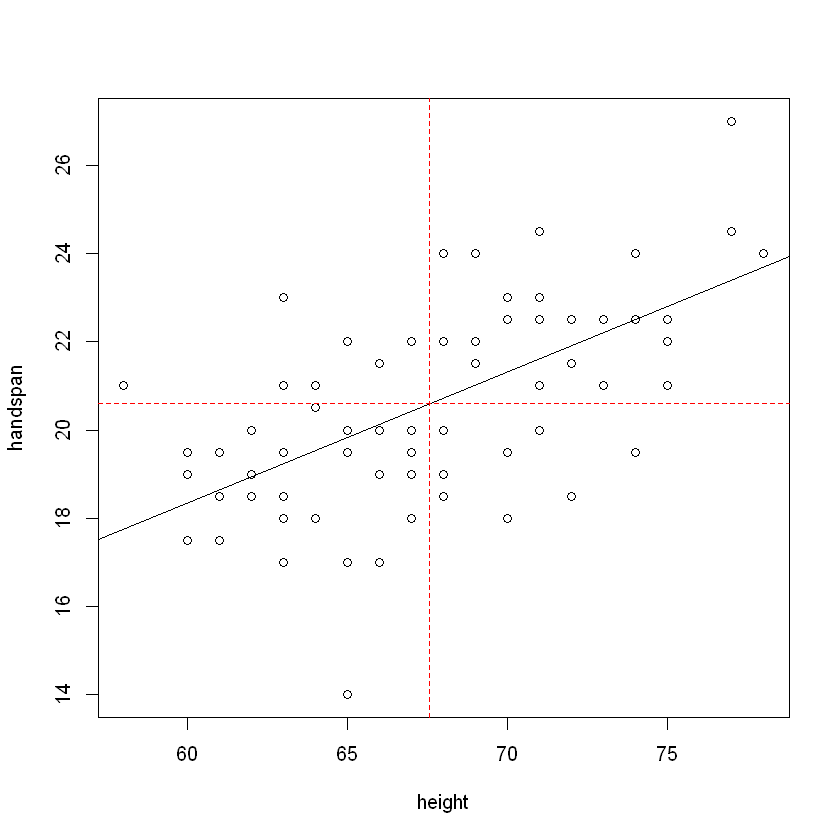

In [34]:
survey[ , {
    plot(handspan ~ height)
    abline(lm(handspan ~ height))
    abline(v = mean(height, na.rm = TRUE),
          h = mean(handspan, na.rm = TRUE),
          col = 'red', lty = 2)    
}]

In [ ]:
## ----abline과 sample mean 추가 ---------------------------------
survey[ , {
  plot(handspan ~ height)
  abline(lm(handspan ~ height))
  abline(v = mean(height, na.rm = TRUE),
         h = mean(handspan, na.rm = TRUE),
         col = 'red', lty = 2)
}]

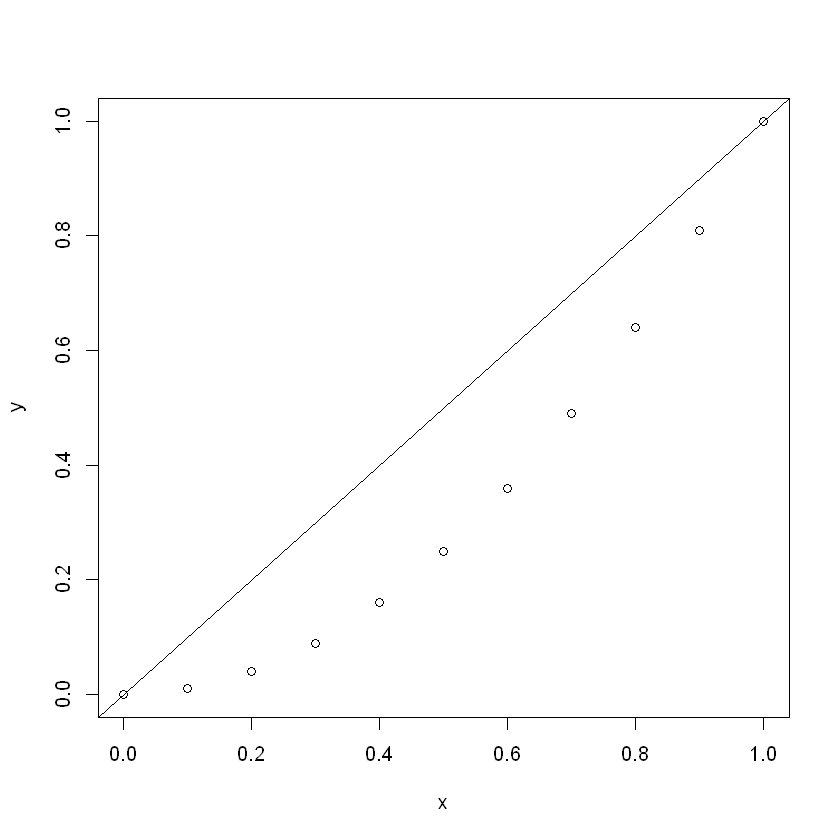

In [35]:
## ----abline_ab, -----------------------------------------
x = seq(from = 0, to = 1, by = 0.1)
y = x^2
plot(y ~ x)
abline(a = 0, b = 1)   #intercept를 0으로, slope을 1로 설정

NULL

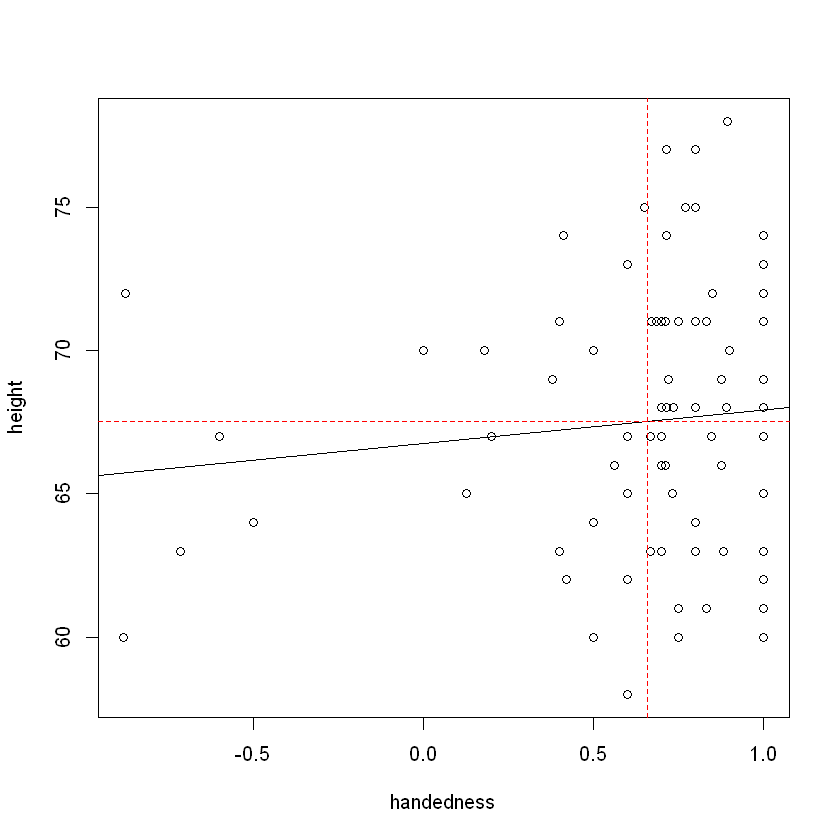

In [36]:
## ----exercise_1, ----------------------------------------
survey[ , {
  reg = lm(height ~ handedness)
  plot(height ~ handedness)
  abline(reg = reg)
  abline(v = mean(handedness, na.rm = TRUE),
         h = mean(height, na.rm = TRUE),
         col = 'red', lty = 2)
}]

## 3.5 Function

In [37]:
z.score = function(x){
    z = (x - mean(x, na.rm = TRUE))/sd(x, na.rm = TRUE)
    return(z)
}

In [38]:
mymean = function(x){
    x = x[!is.na(x)]
    x.bar = sum(x)/length(x)
    return(x.bar)
}

In [39]:
## ----mean: R에 내장된 함수----------------------------------
mean(survey$height, na.rm = TRUE)

[1] 67.54545

In [40]:
## ----mymean: 위에서 만든 함수-----------------------------------------
mymean(survey$height)

[1] 67.54545

In [42]:
mymean2 = function(x){
  x.bar = sum(x, na.rm = TRUE)/length(x)
  return(x.bar)
}
mymean2(survey$height)

# mymean과 mymean2의 비교 
# mymean2 함수 안에서 sum ignores missing observations but length does not.

[1] 66.78652

In [43]:
myvar = function(x){
  x = x[!is.na(x)]
  s.squared = sum((x-mymean(x))^2)/(length(x) - 1)
  return(s.squared)
}

In [44]:
var(survey$handspan, na.rm = TRUE)

[1] 4.753788

In [45]:
myvar(survey$handspan)

[1] 4.753788

In [48]:
# Skewness
skew = function(x){
  x = x[!is.na(x)]
  numerator = sum((x - mean(x))^3)/length(x)
  denominator = sd(x)^3
  return(numerator/denominator)  
}
skew(survey$handedness)

[1] -2.219056

In [51]:
# function_return_data.table
summary.stats = function(x){
  x = x[!is.na(x)]
  sample.mean = mean(x)
  std.dev  = sd(x)
  out = data.table(sample.mean, std.dev)
  return(out)
}
results = summary.stats(survey$handedness)
results
results$sample.mean
results$std.dev

sample.mean,std.dev
<dbl>,<dbl>
0.6578936,0.4077245


[1] 0.6578936

[1] 0.4077245

In [52]:
# mycov
mycov = function(x, y){
  
  keep = !is.na(x) & !is.na(y)
  x = x[keep]
  y = y[keep]
  
  n = length(x)
  
  s.xy = sum( (x - mean(x)) * (y - mean(y)) ) / (n-1)
  return(s.xy)
}

In [53]:
survey[ , cov(handspan, handedness, use = "complete.obs")]
survey[ , mycov(handspan, handedness)]

[1] -0.01556655

[1] -0.01556655